In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/Main_data.txt", sep=">", header=None)
df = df.drop([1],1).dropna().reset_index().drop(['index'],1)

In [ ]:
# all_filenames = ['/content/drive/My Drive/Colab Notebooks/RNAbinding/PSSMmatrices_train/final_result ('+str(i)+').csv' for i in range(69)]
# all_filenames[0] = all_filenames[0][:-8]+all_filenames[0][-4:]
# combined_csv_data = pd.concat([pd.read_csv(f) for f in all_filenames])
# combined_csv_data.to_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/rawTrain.csv")

In [23]:
s = ""
for index, i in enumerate(df[0]):
    if index&1 == 1:
        s += i

In [24]:
X = pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/rawTrain.csv").drop('Unnamed: 0',1)
y = pd.DataFrame([i for i in s])

In [25]:
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [ ]:
# y.shape

In [26]:
kf = KFold()

In [27]:
X1 = X.to_numpy()
y1 = y.to_numpy().reshape(1,len(y))[0]

In [ ]:
import math as mt
X1 = (np.log2(X1/0.05))/mt.log2(10)
X1 = 1/(1+2**-X1)

In [29]:
clf = SVC(class_weight='balanced')

0.8229845626072041
0.3433906163870211
[[2189  250]
 [ 266  210]]
0.7972555746140652
0.41323233169498363
[[1982  368]
 [ 223  342]]
0.8205831903945111
0.42944917521138704
[[2100  353]
 [ 170  292]]
0.7241852487135506
0.44399199506484355
[[1192  429]
 [ 375  919]]
0.7676733013040494
0.45671782892558316
[[1681  283]
 [ 394  556]]


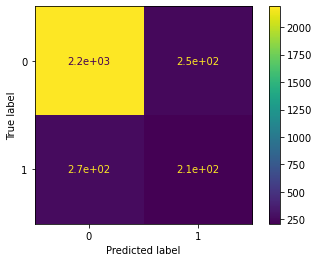

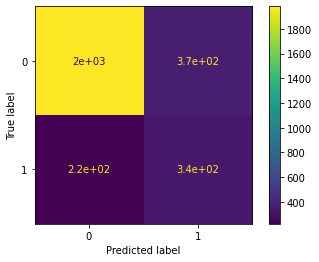

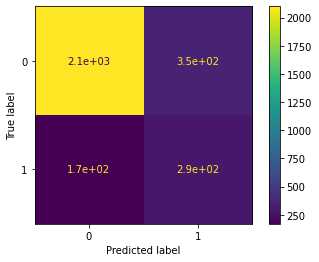

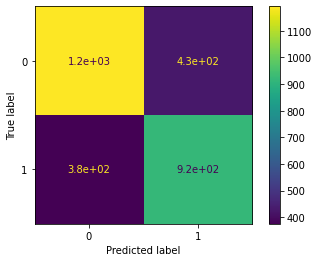

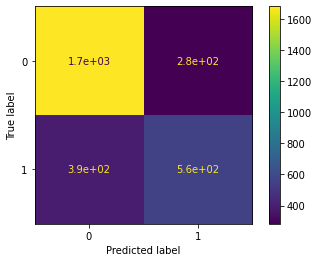

In [30]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    clf.fit(X_train, y_train)
    print(clf.score(X_test,y_test))

    y_pred = clf.predict(X_test)
    print(matthews_corrcoef(y_test, y_pred))
    disp = plot_confusion_matrix(clf, X_test, y_test)
    print(disp.confusion_matrix)

TESTING

In [2]:
# test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/Test_data.txt", sep=">", header=None)
# test = test.drop([1],1).dropna().reset_index().drop(['index'],1)

In [31]:
# all_filenames = ['/content/drive/My Drive/Colab Notebooks/RNAbinding/PSSMmatrices_test/final_result ('+str(i)+').csv' for i in range(17)]
# all_filenames[0] = all_filenames[0][:-8]+all_filenames[0][-4:]
# combined_csv_data = pd.concat([pd.read_csv(f) for f in all_filenames])
# combined_csv_data.to_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/rawTest.csv")

In [32]:
X_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNAbinding/rawTest.csv").drop('Unnamed: 0',1)
X_test = X_test.to_numpy()

In [ ]:
X_test = (np.log2(X_test/0.05))/mt.log2(10)
X_test = 1/(1+2**-X_test)

In [35]:
res = clf.predict(X_test)

In [36]:
import csv

In [37]:
f = open("/content/drive/My Drive/Colab Notebooks/RNAbinding/ans.csv", "w")
writer = csv.DictWriter(f, fieldnames=["Id", "Expected"])
writer.writeheader()
f.close()

In [38]:
id = 0
with open('/content/drive/My Drive/Colab Notebooks/RNAbinding/ans.csv', 'a', newline='') as f:
    writer = csv.writer(f)
    for row in res:
        writer.writerow([id, row])
        id = id + 1
f.close()